<a href="https://colab.research.google.com/github/DilshanBotheju/HandWrittenNumberRecognizer/blob/main/HandWrittenLetterRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install tensorflow scikit-learn

In [41]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [36]:
# Path to your text file
file_path = "/content/drive/MyDrive/LetterRecognizer/letters.csv"

# Having arrays to save images and labels respectively
imagePaths = []
labels = []

#Load the image paths and labels
with open(file_path, 'r') as file:
    next(file)
    for line in file:
        imagePath, label = line.strip().split(',')
        imagePaths.append(imagePath)
        labels.append(label)
print(imagePaths)
print(labels)

['/content/drive/MyDrive/LetterRecognizer/letters/img001-001.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-002.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-003.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-004.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-005.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-006.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-007.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-008.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-009.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-010.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-011.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-012.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-013.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-014.png', '/content/drive/MyDrive/LetterRecognizer/letters/img001-015.png', '/content

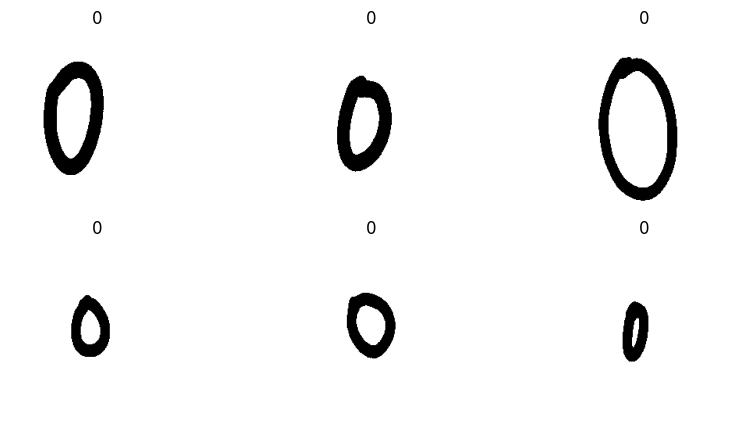

In [37]:
plt.figure(figsize=(10, 5))

for i in range(6):
    img_path = imagePaths[i]

    # Check if the image exists
    if os.path.exists(img_path):
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img) / 255.0

        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(labels[i])
        plt.axis("off")
    else:
        print(f"Missing file: {img_path}")

plt.show()

# Image Preprocessing

In [38]:
Preprocessed_images = []

for imagePath in imagePaths:


    # Read the image in grayscale
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

    # Resize the images
    image = cv2.resize(image, (224, 224))

    # Normalize the images
    image = image / 255.0

    # Thresholding
    _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)

    # Noise reduction using guassina blur
    image = cv2.GaussianBlur(image, (5, 5), 0)

    Preprocessed_images.append(image)

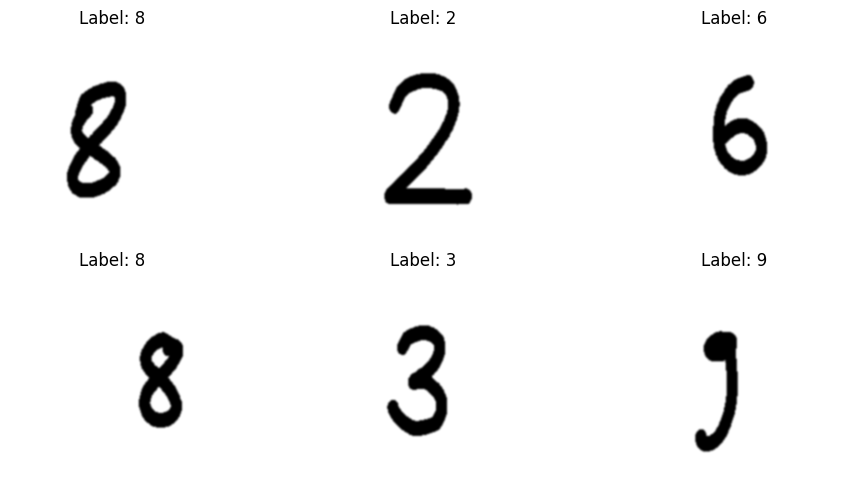

In [43]:
# Display random preprocessed images with their labels
plt.figure(figsize=(10, 5))

random_preprocessed_images = random.sample(range(len(Preprocessed_images)), min(6, len(Preprocessed_images)))

for i, idx in enumerate(random_preprocessed_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(Preprocessed_images[idx], cmap='gray')
    plt.title(f"Label: {labels[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()